# **Model Evaluation on Laptop pricing**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv")
df.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"], inplace=True)
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


## **1. Grid Search**

In [17]:
x_data = df.drop(columns = "Price")
y_data = df["Price"]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

X_train1 = X_train[["CPU_frequency"]]

lr.fit(X_train1, y_train)

lr.score(X_test[["CPU_frequency"]], y_test)

0.3677644853113259

In [23]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(lr, X_train1, y_train, cv=4)
cvs.mean(), cvs.std()

(-0.009367898852008255, 0.22060181705019274)

In [25]:
## **2. Overfitting**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5)

In [38]:
from sklearn.preprocessing import PolynomialFeatures

X_train1 = X_train[["CPU_frequency"]]
X_test1 = X_test[["CPU_frequency"]]

degrees = [1,2,3,4,5,6,7,8,9,10]
results = []
for n in degrees:
    pr = PolynomialFeatures(degree=n)

    X_train_pr = pr.fit_transform(X_train1)
    X_test_pr = pr.transform(X_test1)

    lr = LinearRegression()

    lr.fit(X_train_pr, y_train)
    results.append(lr.score(X_test_pr, y_test))
    
results

[0.07284152859870474,
 0.15171942088404122,
 0.19401224148350937,
 0.011334611540070316,
 -10.381858911526137,
 -28.145218104537598,
 -1978.4693599987838,
 -908153.1386403537,
 -19447585.279271267,
 -1649345758.3213634]

Text(0, 0.5, 'R-cuadrada')

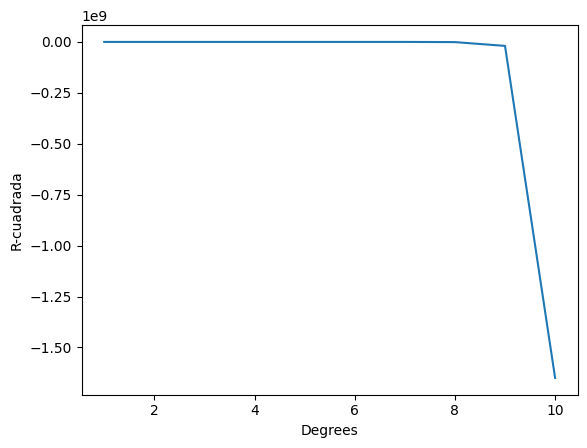

In [39]:
plt.plot(degrees, results)
plt.xlabel("Degrees")
plt.ylabel("R-cuadrada")

## **3. Ridge Regression**
---

In [35]:
X_train2 = X_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']] 
X_test2 = X_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']]

In [40]:
pr = PolynomialFeatures(2)

X_train2_pr = pr.fit_transform(X_train2)
X_test2_pr = pr.transform(X_test2)

In [44]:
from sklearn.linear_model import Ridge

alphas = np.arange(0.001, 1, 0.001)

results_train = []
results_test = []

for alpha in alphas:
    rr = Ridge(alpha=alpha)
    
    rr.fit(X_train2_pr, y_train)

    results_train.append(rr.score(X_train2_pr, y_train))
    results_test.append(rr.score(X_test2_pr, y_test))

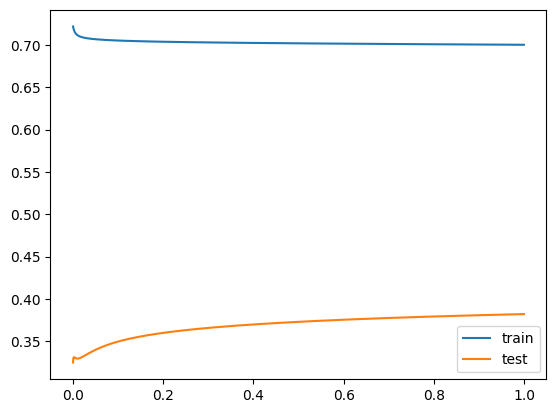

In [48]:
plt.plot(alphas, results_train, label="train")
plt.plot(alphas, results_test, label="test")
plt.legend()

## **4. Grid Search**
---

In [50]:
from sklearn.model_selection import GridSearchCV

params = [{"alpha":[0.0001, 0.001, 0.01, 0.1, 1, 10]}]

rr = Ridge()

gr = GridSearchCV(rr, params, cv=4)

gr.fit(X_train2, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [52]:
bestrr = gr.best_estimator_
bestrr.score(X_test2, y_test)

0.4806205751212479